# Data from yFinance

 - About the yFinance Python Library

[yFinance library](#(#https://www.geeksforgeeks.org/machine-learning/what-is-yfinance-library/)) (Python) provides easy access to [Yahoo Finance](#https://finance.yahoo.com/) data. It is a key tool for investors and data analysts, offering a user-friendly way to download comprehensive market data directly in Python.

Key Features:

1. Historical Data: Download OHLC (Open, High, Low, Close) prices and volume data.

2. Financial Statements: Access balance sheets, income statements, and cash flow statements.

3. Corporate Actions: Get data on stock splits and dividends.

4. Company Metrics: Includes key data like earnings dates and EPS.

5. Multiple Tickers: Download data for several stocks at once for portfolio analysis.


 - What is the FAANG Stock

[FAANG](#https://www.investopedia.com/terms/f/faang-stocks.asp) is an acronym for five major American technology companies: Meta (formerly known as Facebook), Amazon, Apple, Netflix, and Alphabet (formarly known as Google).

These companies have a massive influence on the stock market and are part of major indices like the S&P 500. 


## Task 1: yFinance

Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

• Facebook (META)

• Apple (AAPL)

• Amazon (AMZN)

• Netflix (NFLX)

• Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two-digit day, and HHmmss is hour, minutes, seconds.

Create the data folder if you don't already have one.

Link for yfinance: https://github.com/ranaroussi/yfinance

### Importing all libraries

In [1]:
# Import Dates and Times
import datetime as dt

# Import yfinance and getting the data ready to run
import yfinance as yf

# Import Data Frames
import pandas as pd

In [2]:
# Define FAANG Stock Tickers
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]


In [3]:
# Download data for the required stocks (FAANG)
df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h', auto_adjust=True)

[*********************100%***********************]  5 of 5 completed


In [5]:
# Save the data frame to CSV
now= dt.datetime.now()

# Source: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

# Create the filename (and add formatting date and time) 
filename = "../data/" + now.strftime("%Y%m%d-%H%M%S") + ".csv"

# Save data to CSV File
df.to_csv(filename)


OSError: Cannot save file into a non-existent directory: '../data'

# Problem 2: Plotting FAANG Closing Prices

#### A picture is worth a thousand words...

Task 2: Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

In [ ]:
# Import matplotlib for plotting the data
import matplotlib.pyplot as plt

In [ ]:
# Display the first five rows of the Data Frame (df)
df.head()


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-10 14:30:00+00:00  271.856995  248.029999  288.720001  633.837402   
2025-11-10 15:30:00+00:00  269.066406  246.380005  286.965515  630.409973   
2025-11-10 16:30:00+00:00  269.079987  247.104996  287.309998  633.864990   
2025-11-10 17:30:00+00:00  269.730011  248.630005  288.839996  632.840027   
2025-11-10 18:30:00+00:00  269.660004  248.769897  291.100006  632.780029   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-10 14:30:00+00:00  1124.795044  273.730011  251.750000  290.429993   
2025-11-10 15:30:00+00:00  1116.630005  271.989990  248.089996  289.269897   
2025-11-10 16:30:00+00:00  1116.839844  269.758789  247.445007  287.579987   
2025-11-10 17:30:00+00:00  1115.630005  270.230011  248.899994  289.329987   
2025-11-10 18:30:00+00:00  1115.599976  270.307709  248.956406  291.429993   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-10 14:30:00+00:00  634.960022  1128.189941  ...  268.950012   
2025-11-10 15:30:00+00:00  633.880005  1127.155029  ...  271.829987   
2025-11-10 16:30:00+00:00  634.460022  1122.250000  ...  269.040009   
2025-11-10 17:30:00+00:00  635.000000  1118.727173  ...  269.070007   
2025-11-10 18:30:00+00:00  634.650024  1118.180054  ...  269.709991   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-10 14:30:00+00:00  248.309998  285.209991  631.390015  1107.099976   
2025-11-10 15:30:00+00:00  248.021194  288.704987  633.630005  1124.800049   
2025-11-10 16:30:00+00:00  246.339996  286.945007  630.409973  1116.630005   
2025-11-10 17:30:00+00:00  247.104996  287.339996  633.929993  1116.666382   
2025-11-10 18:30:00+00:00  248.653000  288.869995  632.840027  1115.650024   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-11-10 14:30:00+00:00  7030981  7213922  4164797  3873187  720526  
2025-11-10 15:30:00+00:00  3083676  3238084  1570763  1532229  257424  
2025-11-10 16:30:00+00:00  2346213  2393779   892605  1088389  175811  
2025-11-10 17:30:00+00:00  1807442  1959822   743976   879505  162437  
2025-11-10 18:30:00+00:00  3188667  1461943  1315791   781607  171050  

[5 rows x 25 columns]

In [ ]:
# List Columns of df
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [ ]:
# Display Close prices only
df['Close']

Ticker,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,
2025-11-10 14:30:00+00:00,271.856995,248.029999,288.720001,633.837402,1124.795044
2025-11-10 15:30:00+00:00,269.066406,246.380005,286.965515,630.409973,1116.630005
2025-11-10 16:30:00+00:00,269.079987,247.104996,287.309998,633.864990,1116.839844
2025-11-10 17:30:00+00:00,269.730011,248.630005,288.839996,632.840027,1115.630005
2025-11-10 18:30:00+00:00,269.660004,248.769897,291.100006,632.780029,1115.599976
2025-11-10 19:30:00+00:00,269.118591,248.270004,290.559998,632.632019,1120.659912
2025-11-10 20:30:00+00:00,269.359985,248.410004,290.589996,631.770020,1120.189941
2025-11-11 14:30:00+00:00,274.100006,248.467804,289.459991,622.369995,1123.510010
2025-11-11 15:30:00+00:00,272.500000,247.580002,289.149994,622.369995,1125.060059


<Axes: xlabel='Datetime'>

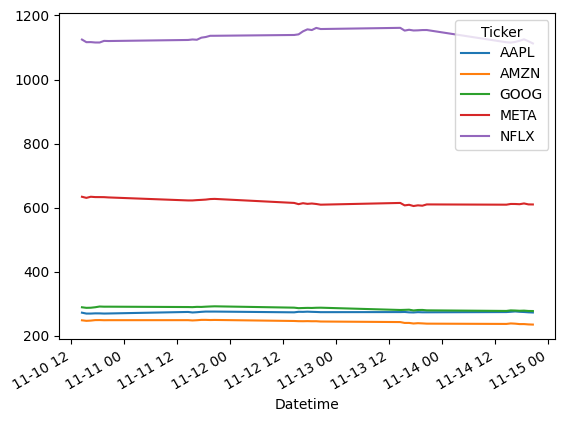

In [ ]:
# Plot closing prices for FAANG stocks
df['Close'].plot()

Problem 3: Script
Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

Problem 4: Automation
Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.